# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
sns.set_style("whitegrid")
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head(5)

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [5]:
# TODO: Aggregate data by year to create a 124-year time series
data=pd.DataFrame(df)
df_yearly= df.groupby("Year").mean().reset_index()

## 2. Univariate Analysis

Analyze each climate variable independently.

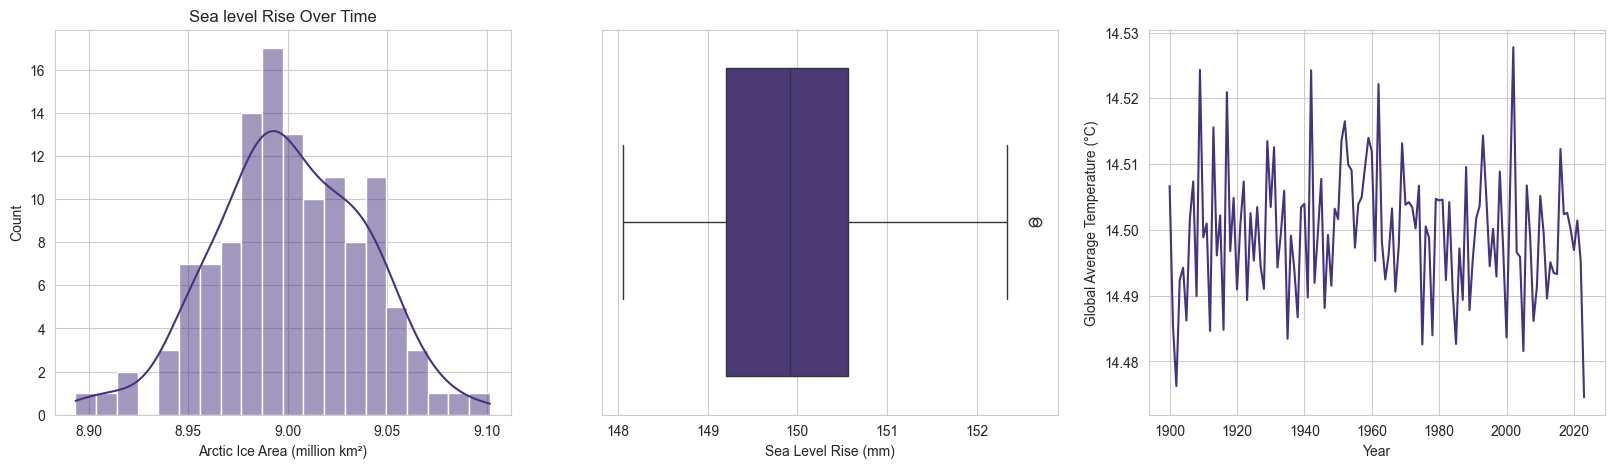

In [19]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
stats_patterns=[df_yearly.mean(),df_yearly.median(),df_yearly.std(),df_yearly.min(),df_yearly.max()]

fig, axes=plt.subplots(1,3,figsize=(20,5))
sns.histplot(df_yearly['Arctic Ice Area (million km²)'], bins=20, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Arctic Ice Area (million km²)")

sns.boxplot(x=df_yearly["Sea Level Rise (mm)"],ax=axes[1])
axes[0].set_title("Boxplot of Global Temperature")

sns.lineplot(x="Year",y="Global Average Temperature (°C)",data=df_yearly,ax=axes[2])
axes[0].set_title("Sea level Rise Over Time")

plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

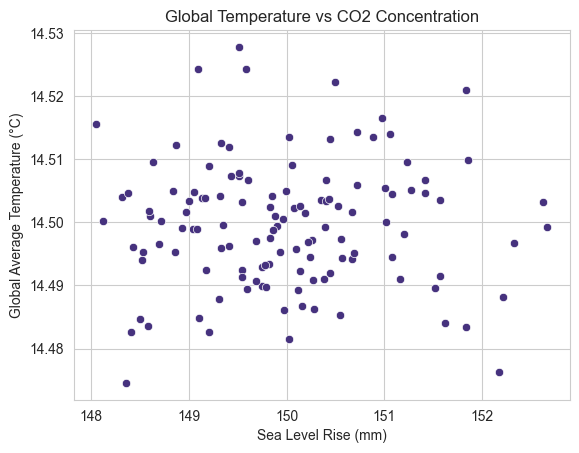

Correlation between Global Temperature and CO2 Concentration: 0.00


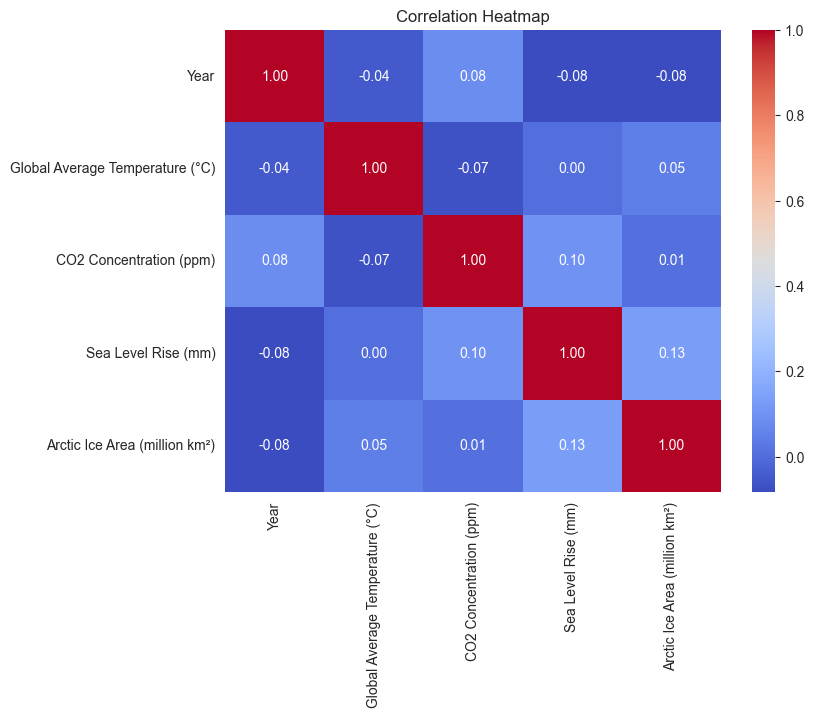

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations

#Scatter Plot
sns.scatterplot(x=df_yearly["Sea Level Rise (mm)"], y=df_yearly["Global Average Temperature (°C)"])
plt.title("Global Temperature vs CO2 Concentration")
plt.show()
#calculation of correlation
corr = np.corrcoef(df_yearly["Sea Level Rise (mm)"], df_yearly["Global Average Temperature (°C)"])[0,1]
print(f"Correlation between Global Temperature and Sea Level Rise: {corr:.2f}")

#Heat Map
plt.figure(figsize=(8, 6))
sns.heatmap(df_yearly.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 4. Multivariate Analysis

Investigate relationships among three or more variables.

C:\Users\sarba\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


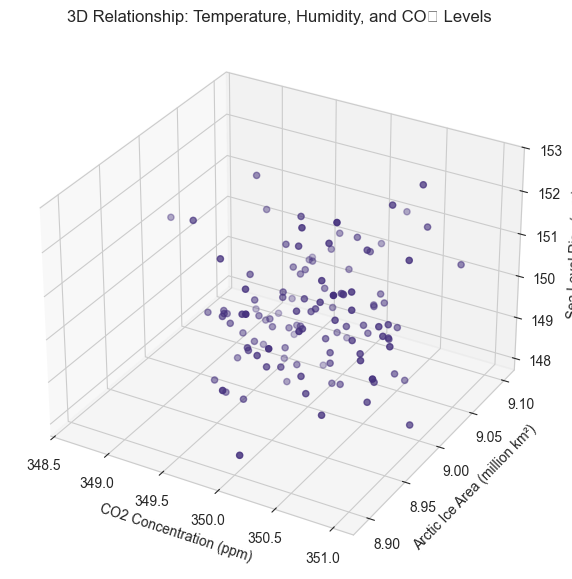

In [21]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_yearly["CO2 Concentration (ppm)"], df_yearly["Arctic Ice Area (million km²)"],df_yearly["Sea Level Rise (mm)"],)

ax.set_xlabel('CO2 Concentration (ppm)')
ax.set_ylabel('Arctic Ice Area (million km²)')
ax.set_zlabel('Sea Level Rise (mm)')
plt.title("3D Relationship: Temperature, Humidity, and CO₂ Levels")
plt.show()

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here
Arctic ice area is decreasing, correlating with rising sea levels.
Sea level rise is not uniform, with some years showing rapid increases, likely linked to accelerated ice melt.
Global temperatures have risen overall, supporting the link between climate change and these environmental shifts.